In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import re
import json

1.Lecture des datasets 

In [4]:
#Dataset 1 : players 
df1 = pd.read_csv('atp_players.csv')
df1.head()

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,Egan,E,Adams,Adams E,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,...,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,Ronald,R,Agenor,Agenor R,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,...,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


2.Supression des colonnes vides : 

In [5]:
df1 = df1.dropna(axis=1, how='all')
df1.head()

,player_id,first_name,first_initial,last_name,full_name,player_url,flag_code,residence,birthplace,birthdate,...,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,Ricardo,R,Acuna,Acuna R,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,...,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,Sadiq,S,Abdullahi,Abdullahi S,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,19600202,...,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,Nelson,N,Aerts,Aerts N,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,...,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,Egan,E,Adams,Adams E,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,...,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,Ronald,R,Agenor,Agenor R,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,...,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


2.Affichage des valeurs manquantes 

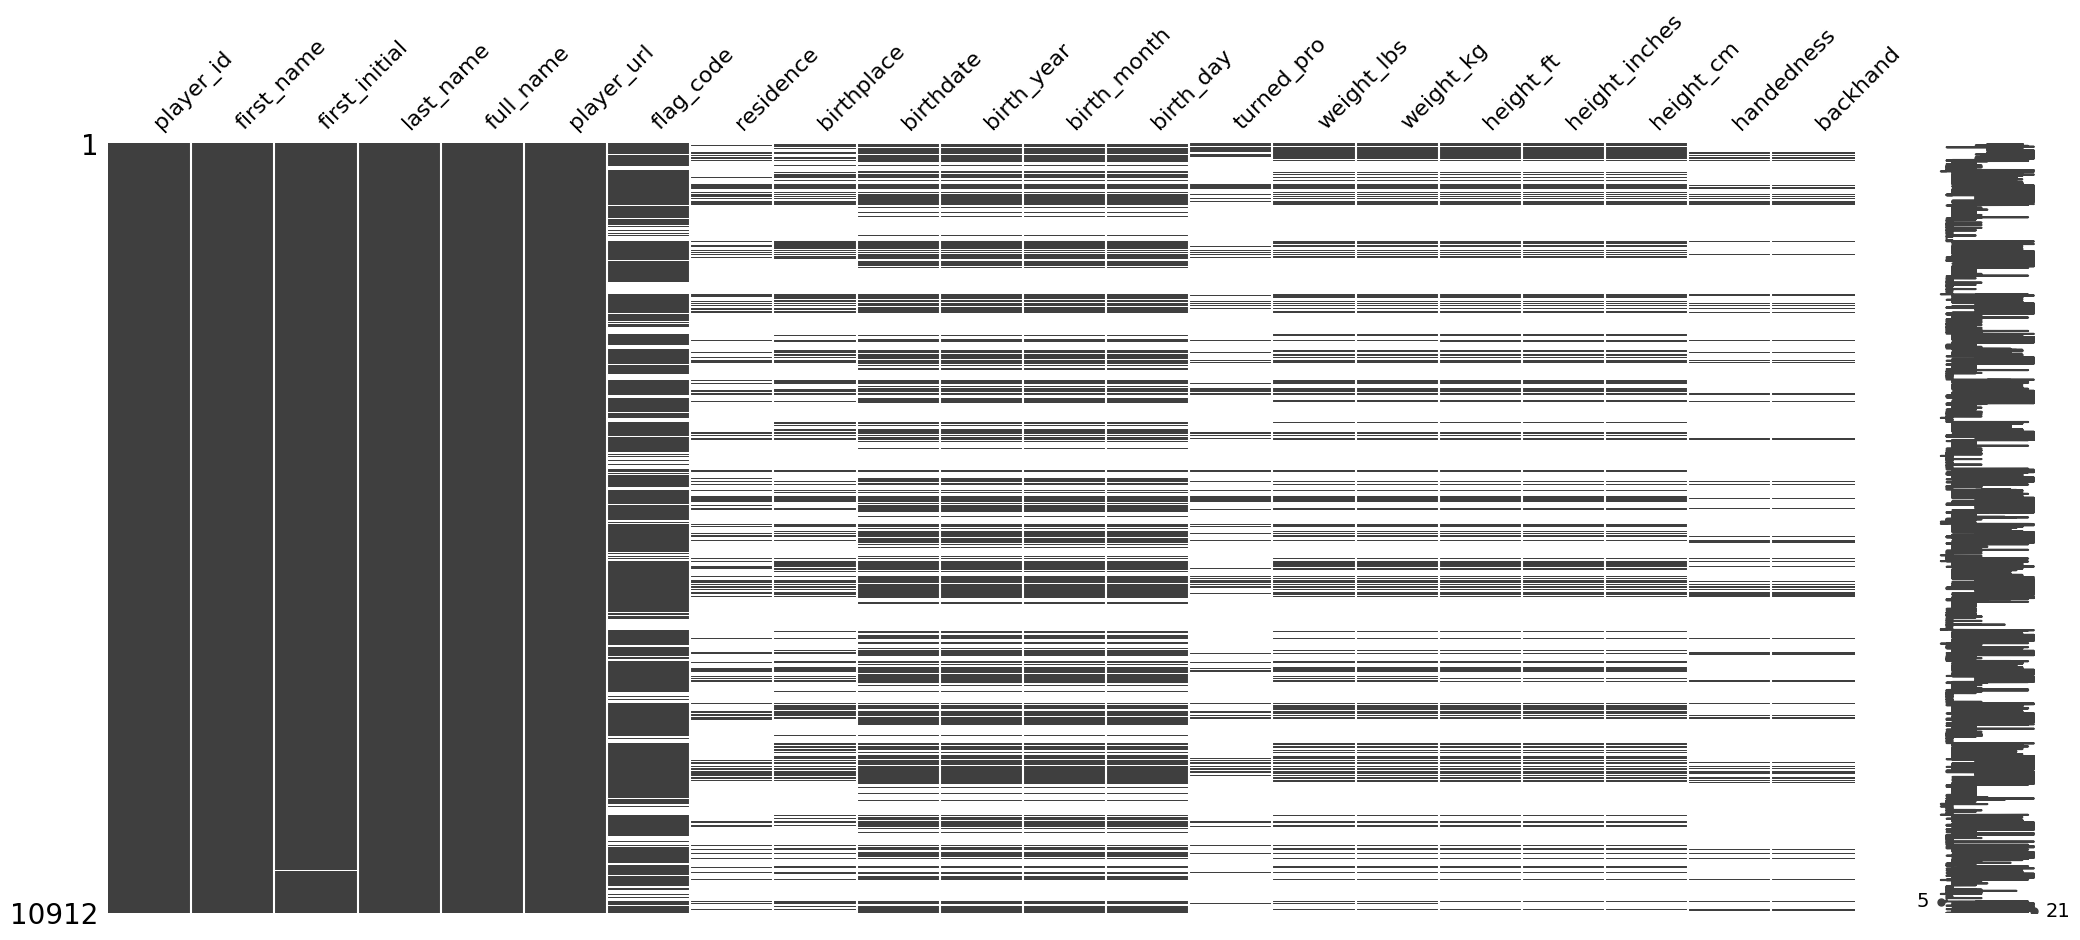

In [6]:
msno.matrix(df1)
plt.show()

3.Supression des colonnes pas importantes 


In [7]:
colonnes_a_supprimer = ['first_initial', 'player_id', 'full_name', 'player_url', 
                        'birth_month', 'birth_day', 'weight_lbs', 'height_ft', 
                        'height_inches']
df1 = df1.drop(columns=colonnes_a_supprimer)
df1.head()

,first_name,last_name,flag_code,residence,birthplace,birthdate,birth_year,turned_pro,weight_kg,height_cm,handedness,backhand
0,Ricardo,Acuna,CHI,"Jupiter, FL, USA","Santiago, Chile",19580113,1958.0,0.0,68.0,175.0,NaN,NaN
1,Sadiq,Abdullahi,NGR,NaN,NaN,19600202,1960.0,0.0,0.0,0.0,NaN,NaN
2,Nelson,Aerts,BRA,NaN,"Cachoeira Do Sul, Brazil",19630425,1963.0,0.0,75.0,188.0,NaN,NaN
3,Egan,Adams,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",19590615,1959.0,0.0,73.0,178.0,NaN,NaN
4,Ronald,Agenor,USA,"Beverly Hills, California, USA","Rabat, Morocco",19641113,1964.0,1983.0,82.0,180.0,NaN,NaN


4.Remplacer par 0 


In [8]:
df1 = df1.fillna(0)

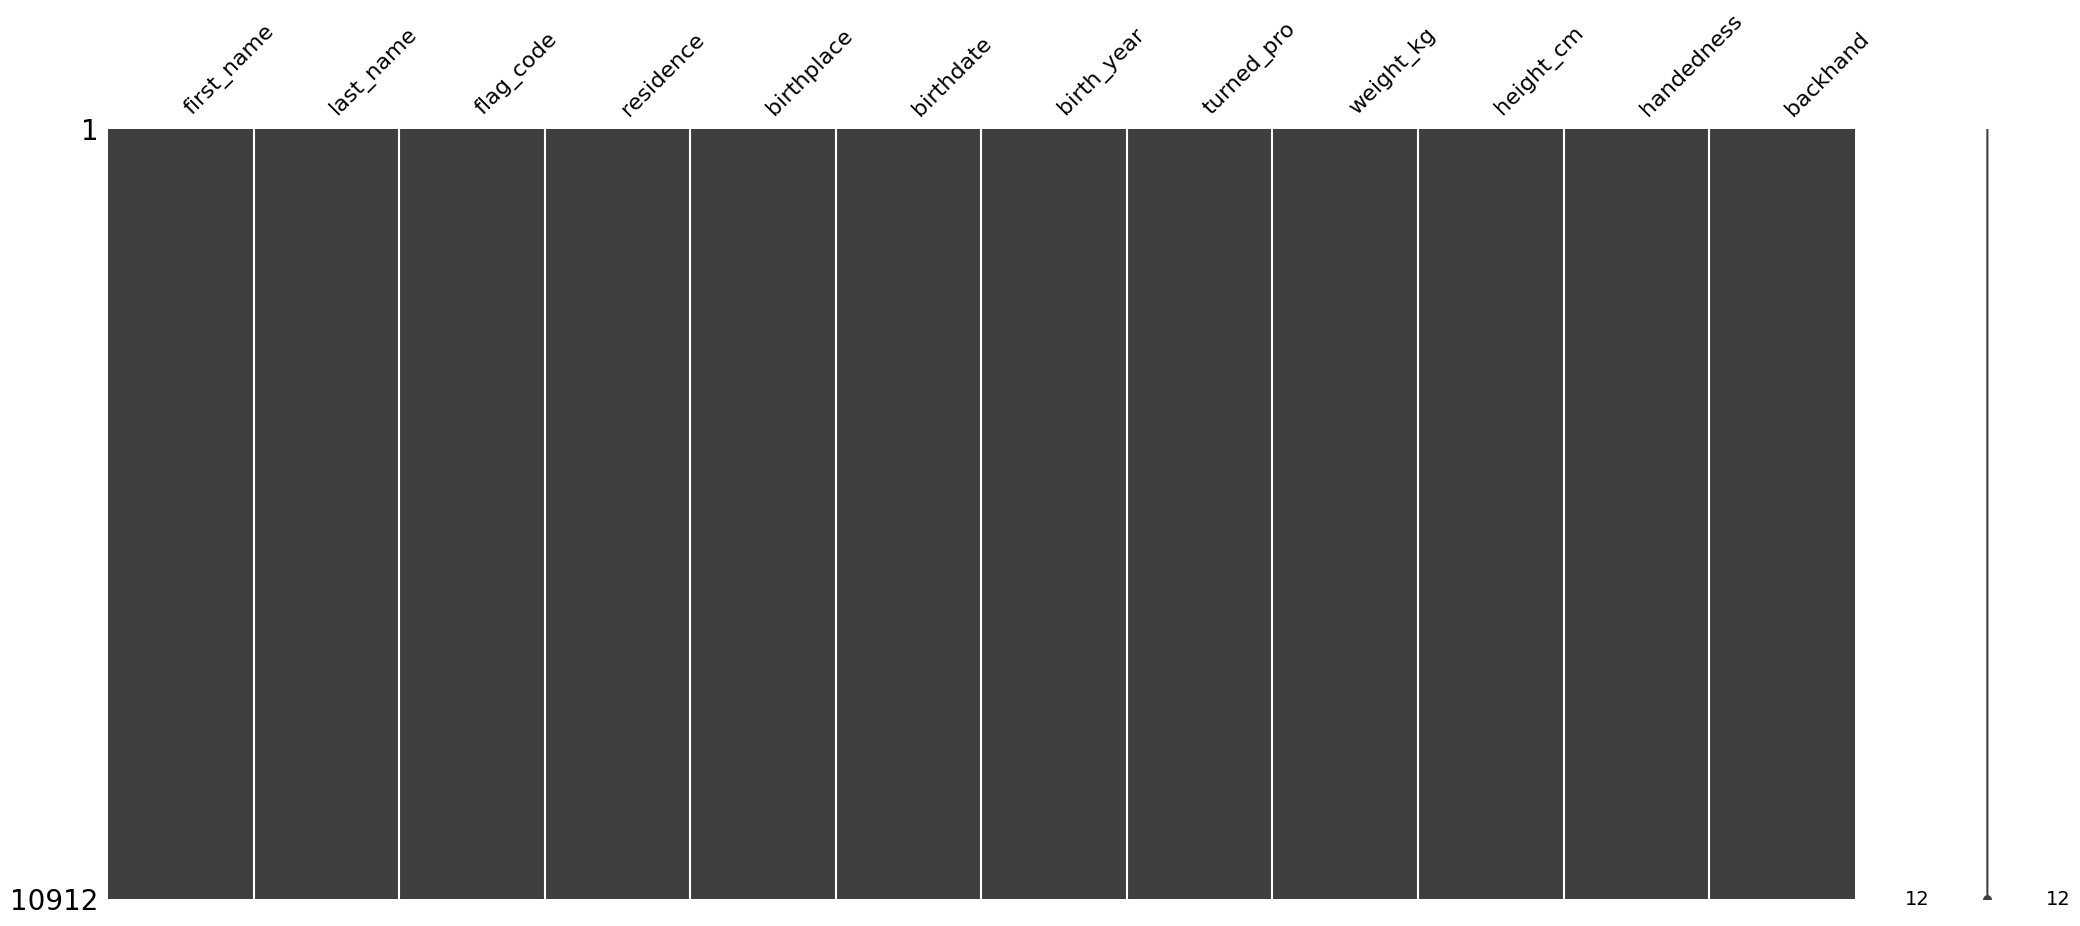

In [9]:
msno.matrix(df1)
plt.show()

-------------------------------------------------------- Fin atp players --------------------------------------------------------------------------------------------